In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [29]:
IMAGAE_SIZE=256
BATCH_SIZE=64

In [30]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    'PlantVillage',
    shuffle=True,
    image_size=(IMAGAE_SIZE,IMAGAE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [31]:
class_name=dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [32]:
len(dataset)

34

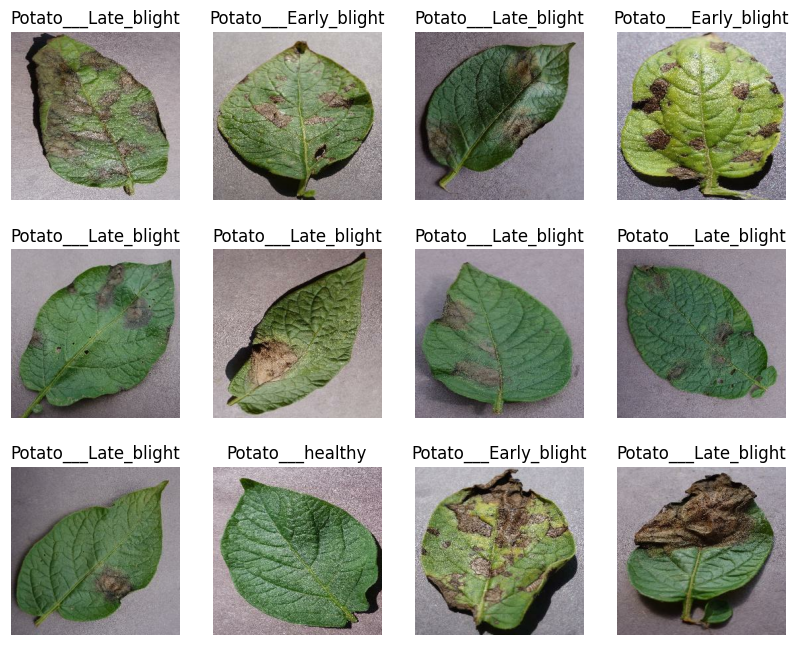

In [33]:
plt.figure(figsize=(10,8))
for image_batch,label in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label[i]])
        plt.axis("off")

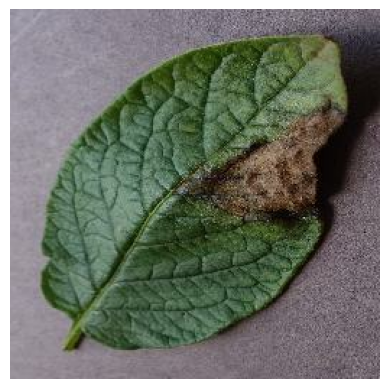

In [34]:
for image_batch,label in dataset.take(1):
    
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")

In [35]:
def get_partion_for_train_validaition_test(ds,train=0.8,vali=0.1,test=0.,shuffle=True,shuffle_size=100):
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=42)
    train_size=int(len(ds)*train)
    vali_size=int(len(ds)*vali)
    test_size=int(len(ds)*test)
    ds_train=ds.take(train_size)
    ds_validate=ds.skip(train_size).take(vali_size)
    ds_test=ds.skip(vali_size).take(test_size)
    return ds_train,ds_validate,ds_test


In [36]:
train,vali,test=get_partion_for_train_validaition_test(dataset)

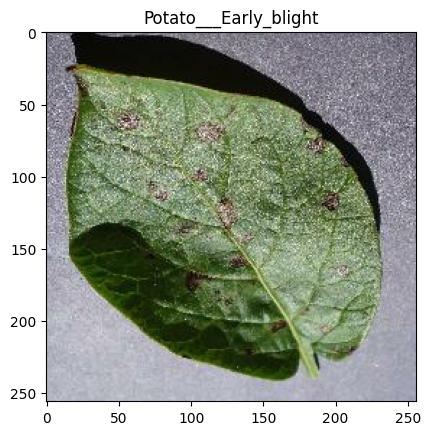

In [37]:
for image_batch,label in train.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_name[label[0].numpy()])

In [38]:
train_ds=train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
vali_ds=vali.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [39]:
from tensorflow.keras import layers

In [40]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGAE_SIZE,IMAGAE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255),
])

In [41]:
data_augmentaion=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [42]:
for image in train.take(1):
    print(image[0].shape)

KeyboardInterrupt: 

In [ ]:
input_shape=(64, 256, 256, 3)

In [ ]:
model=tf.keras.Sequential([
    resize_and_rescale,
    data_augmentaion,
   layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
   layers.MaxPooling2D((2,2)),
   layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(len(class_name),activation='softmax'),

])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (64, 256, 256, 3)         0         
                                                                 
 sequential_2 (Sequential)   (64, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (64, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (64, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (64, 125, 125, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPoolin  (64, 62, 62, 128)         0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7047306841796740814
xla_global_id: -1
]


In [ ]:
model.fit(
    train_ds,
    epochs=50,
    batch_size=BATCH_SIZE
)

Epoch 1/50


27/27 [==============================] - 36s 1s/step - loss: 1.1394 - accuracy: 0.4548
Epoch 2/50
27/27 [==============================] - 32s 1s/step - loss: 0.7256 - accuracy: 0.7259
Epoch 3/50
27/27 [==============================] - 33s 1s/step - loss: 0.4670 - accuracy: 0.8345
Epoch 4/50
27/27 [==============================] - 34s 1s/step - loss: 0.3795 - accuracy: 0.8691
Epoch 5/50
27/27 [==============================] - 34s 1s/step - loss: 0.3106 - accuracy: 0.8732
Epoch 6/50
27/27 [==============================] - 36s 1s/step - loss: 0.1867 - accuracy: 0.9313
Epoch 7/50
 1/27 [>.............................] - ETA: 35s - loss: 0.2535 - accuracy: 0.8906

KeyboardInterrupt: 

In [45]:
from tensorflow.keras.models import load_model
model2=load_model(r"C:\Users\ACER\Desktop\bandhan\plantdetection guid\models\2.h5")

In [47]:
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

2/2 [==============================] - 1s 217ms/step


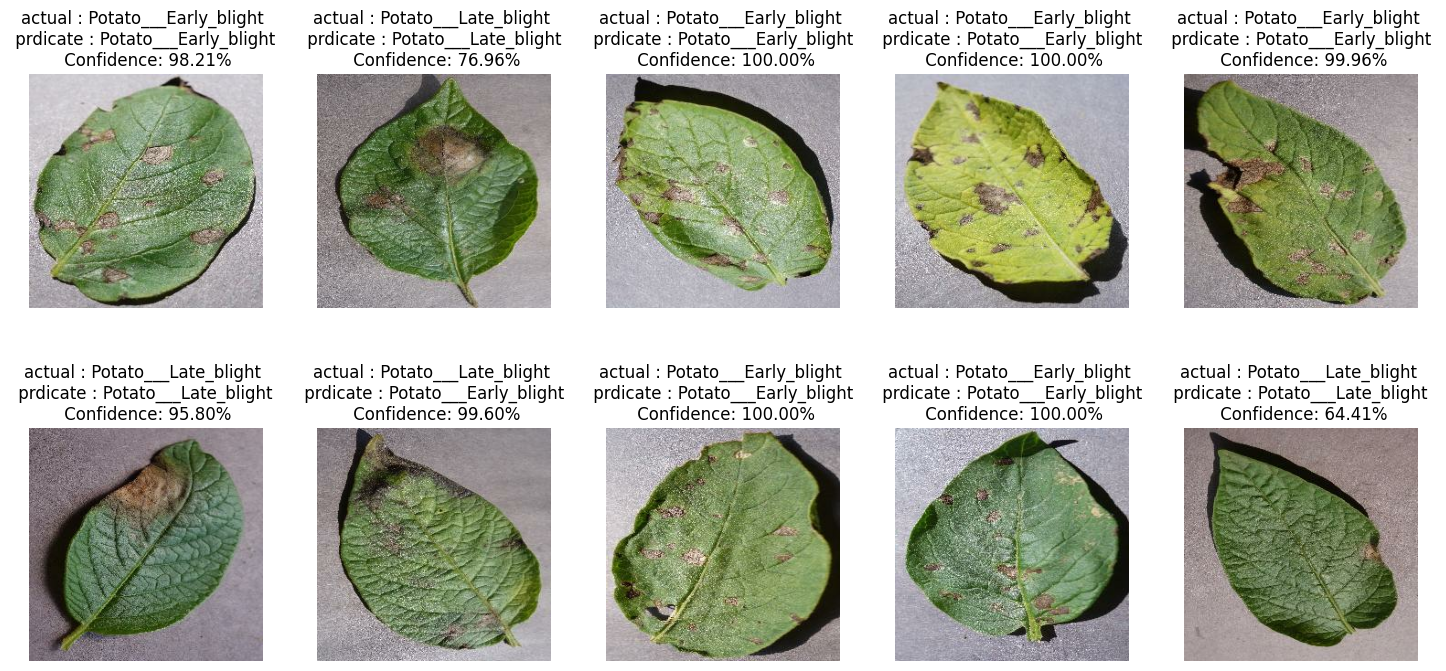

In [46]:
plt.figure(figsize=(15,15))
for image_batch,label in dataset.take(2):

   p= model2.predict(image_batch.numpy())
   for i in range(10):
      plt.subplot(2,5,i+1)
      plt.imshow(image_batch[i].numpy().astype('uint8'))
      plt.title(f"actual : {class_name[label[i]]} \n prdicate : { class_name[np.argmax(p[i])]} \n Confidence: {p[i][np.argmax(p[i])]*100:.2f}%")
      plt.tight_layout(pad=4.0) 



      plt.axis("off")

In [ ]:
model_version=2
model.save(f"./models/{model_version}.h5")

c:\Users\ACER\Desktop\bandhan\plantdetection guid\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
